<a href="https://colab.research.google.com/github/yudhead/Mesin-Learning/blob/main/Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytesseract

In [3]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

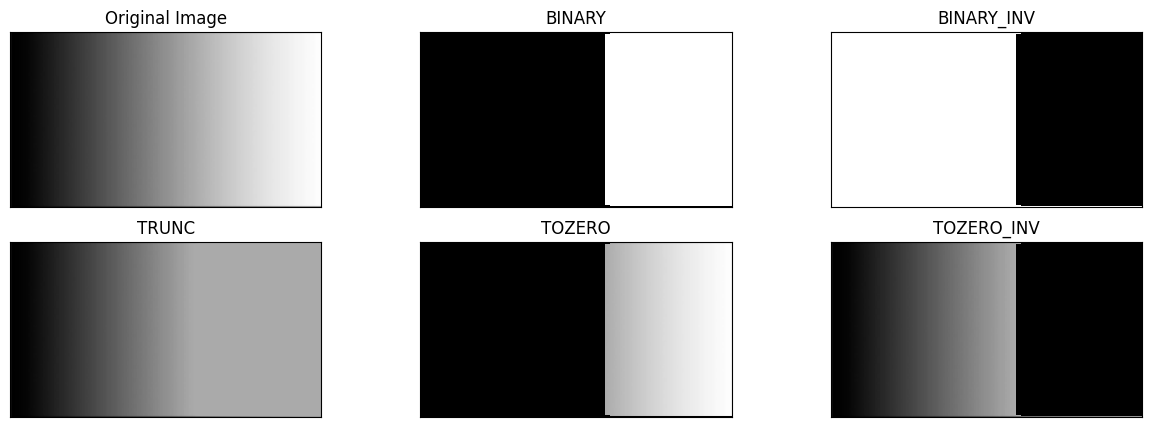

In [4]:
filename = ('/content/drive/MyDrive/PCVK/gradient.png')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0
#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library
#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library
#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library
#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

Nilai threshold Otsu: 157


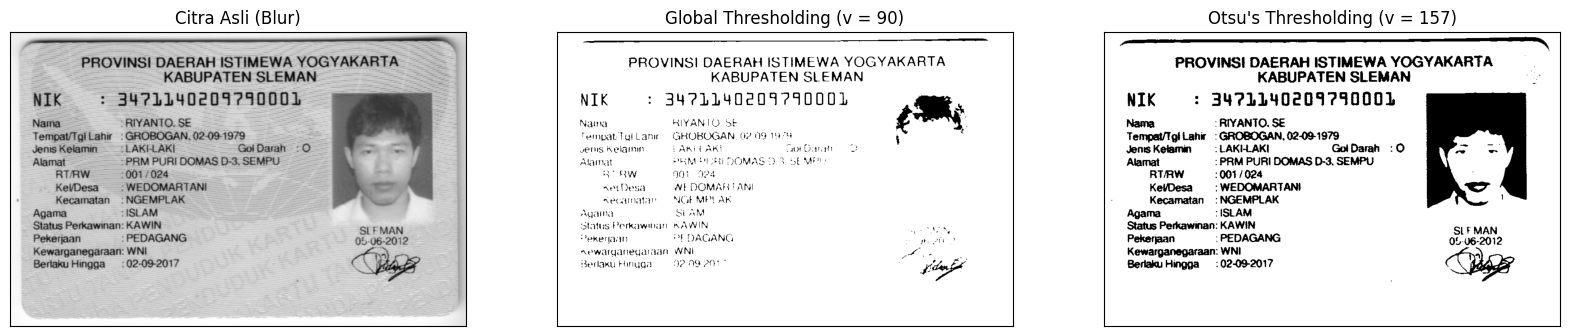

In [5]:

filename = '/content/drive/MyDrive/PCVK/ktp.png'
img = cv.imread(filename, 0)  # baca dalam grayscale
blur = cv.GaussianBlur(img, (5, 5), 0)

# Fungsi manual Otsu Thresholding
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(257))  # histogram intensitas
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    for t in range(1, 256):  # iterasi dari 1 sampai 255
        pcb = np.sum(his[:t])   # jumlah pixel background
        pcf = np.sum(his[t:])   # jumlah pixel foreground

        if pcb == 0 or pcf == 0:  # hindari pembagian nol
            continue

        Wb = pcb * mean_weight
        Wf = pcf * mean_weight

        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)

        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print("Nilai threshold Otsu:", final_thresh)

    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0
    return final_img, final_thresh

# Jalankan Otsu manual

otsu_biner, otsu_thresh = otsu(blur)

# Bandingkan dengan threshold global

ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
titles = ['Citra Asli (Blur)', 'Global Thresholding (v = 90)', f"Otsu's Thresholding (v = {otsu_thresh})"]
citra3 = [blur, th1, otsu_biner]


plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


(0.0, 256.0)

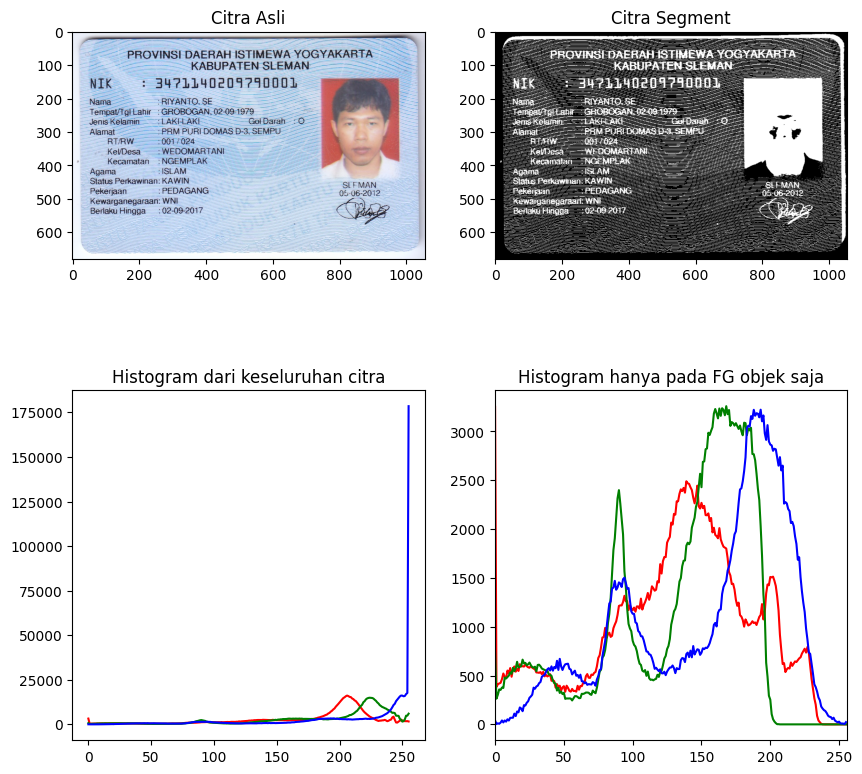

In [6]:
filename = ('/content/drive/MyDrive/PCVK/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0,256])

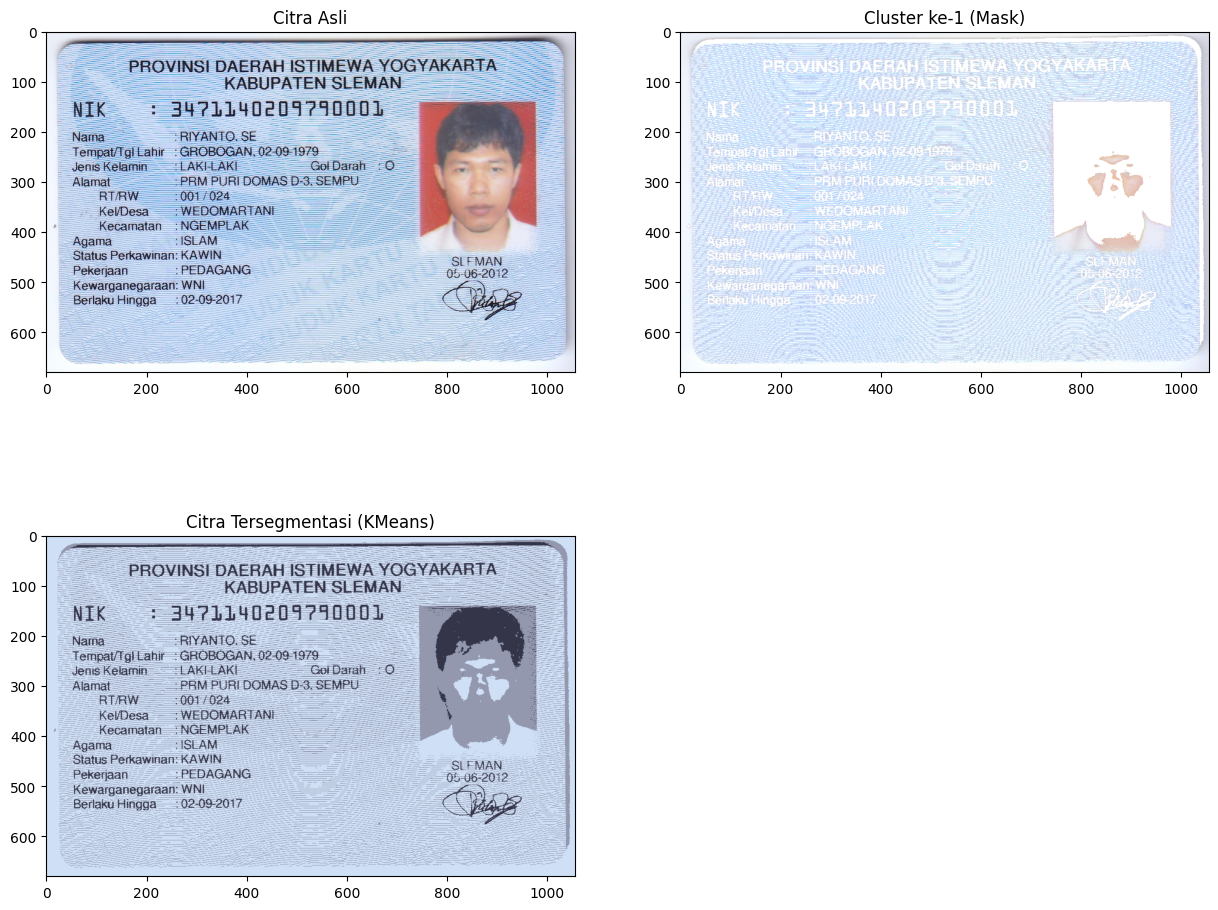

In [7]:
filename = '/content/drive/MyDrive/PCVK/ktp.png'  # hapus spasi di akhir
img = cv.imread(filename)

if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan! Periksa kembali path-nya.")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))

# ubah ke float32 agar sesuai kebutuhan cv.kmeans
pixel_values = np.float32(pixel_values)

# Menentukan kriteria konvergensi dan jumlah cluster

# Kriteria: berhenti jika iterasi > 150 atau pergeseran centroid < 0.1
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

# Asumsi ada 3 warna dominan
k = 3

# Jalankan K-Means
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Konversi titik centroid ke uint8 agar bisa ditampilkan sebagai warna
centers = np.uint8(centers)

# Buat hasil segmentasi
labels = labels.flatten()
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

# Buat masking untuk salah satu cluster (misal cluster ke-1)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]  # hanya tampilkan cluster 1
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img), plt.title("Citra Asli")
plt.subplot(2, 2, 2), plt.imshow(masked_image0), plt.title("Cluster ke-1 (Mask)")
plt.subplot(2, 2, 3), plt.imshow(segmented_image), plt.title("Citra Tersegmentasi (KMeans)")
plt.show()


In [8]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (949 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ind.
(Reading databa

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


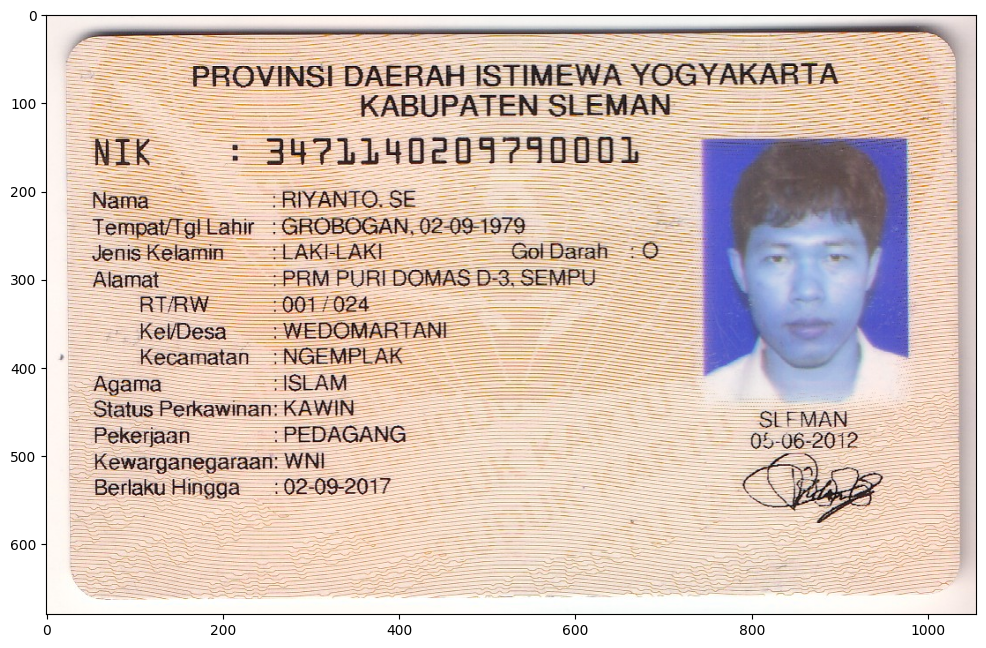

In [13]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/PCVK/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())
n_boxes = len(d['text'])
for i in range(n_boxes):
    if d['text'][i].strip() != "" and int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



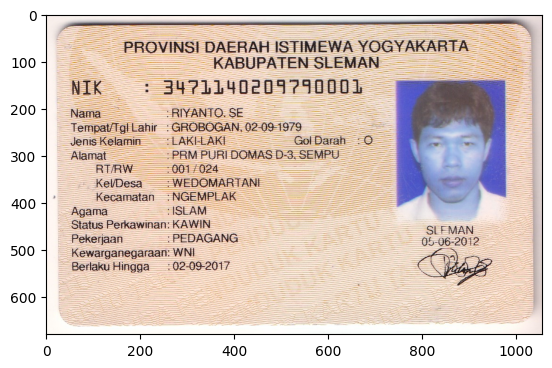

In [10]:
img = cv.imread("/content/drive/MyDrive/PCVK/ktp.png")
plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

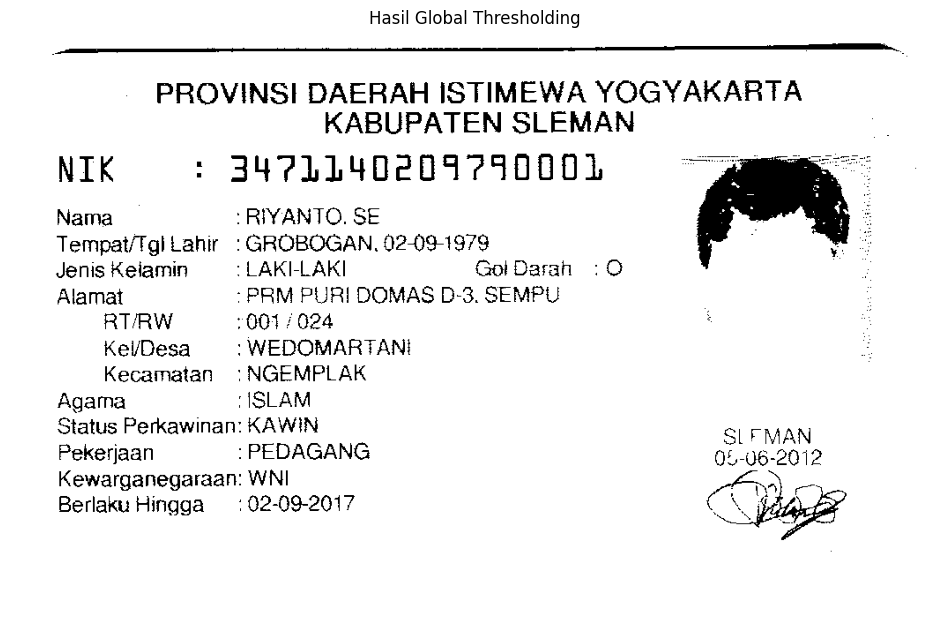

HASIL TEKS TERDETEKSI DARI KTP
 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK > 34741490009 790001

 

Nama :RIYANTO. SE

Tempat/Tgi Lahir : GROBOGAN, 02-09-1979

Jenis Keiamin > LAKI-LAKI Gol Darah 10

Alamat > PRM PURI DOMAS D-3. SEMPU
RT/-RW 7004 / 024

Kel/Desa :WEDOMARTAN!
Kecamatan : NGEMPLAK

Agama SLAM
Status Perkawinan: KAWIN

r
Pekerjaan : PEDAGANG MeN

Kewarganegaraan: WNI

Berlaku Hingga 02-09-2017 CH S

 



In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/ktp.png')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Melakukan thresholding global
_, thresh = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)
# Menerapkan OCR (Optical Character Recognition)
text = pytesseract.image_to_string(thresh, lang='eng')

plt.figure(figsize=(12,10))
plt.imshow(thresh, cmap='gray')
plt.title("Hasil Global Thresholding")
plt.axis('off')
plt.show()


print("HASIL TEKS TERDETEKSI DARI KTP")
print(text)
